# 2. Statistics and correlations
I want to check for correlations with sentiment scores / rank2020 / weight of BoWs in order to test the following hypothesis :
- sentiment scores are significant to extract the most relevant tweet attributes of highly engaged users
- smartcities ranking score is significant to extract the most relevant tweet attributes of highly engaged users
- weight of BoWs are significant to extract the most relevant tweet attributes of highly engaged users

#### Plan :
- Exploratory Data Analytics
- Correlations
- Feature Selection with Linear Regression

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import pandas_profiling
import tkinter as tk
import dowhy
from dowhy import CausalModel

import scipy.stats
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV, RFE, f_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns
import phik

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
sc100_features = pd.read_csv('/Users/juliencarbonnell/Desktop/Thèse/DONNÉES/1.Twitter/smartcities100/sc100_features.csv')

In [3]:
sc100_features.head()

city_id  rank2020  num_tweets  avg_tweet_len  avg_num_words  \
0   abudhabi        42         832     193.930288      25.002404   
1      abuja       107         828     209.646135      27.042271   
2  amsterdam         9        1000     180.311000      22.627000   
3     ankara        57         313     185.808307      22.984026   
4     athens        99        1000     186.752000      24.268000   

   avg_stopwords  avg_num_sentences  avg_word_len  avg_punctuation  \
0       5.794471           1.435096      7.076026        14.016827   
1       5.580918           1.437198      7.075491        15.369565   
2       5.220000           1.520000      7.579219        14.554000   
3       3.974441           1.306709      7.510589        14.747604   
4       5.405000           1.503000      7.170592        15.201000   

   avg_hashtags  avg_numerics  avg_upper   avg_neg   avg_neu   avg_pos  \
0      4.602163      0.278846   1.091346  0.021933  0.860132  0.117936   
1      5.787440      0.404589   1.263285  0.018193  0.856400  0.125396   
2      5.239000      0.153000   0.663000  0.024567  0.875009  0.100439   
3      5.623003      0.338658   0.840256  0.039681  0.865914  0.094422   
4      5.442000      0.226000   0.865000  0.042164  0.865646  0.092190   

   avg_compound  avg_polarity  avg_subjectivity  \
0      0.299883      0.189999          0.349085   
1      0.356573      0.186980          0.365899   
2      0.250798      0.152442          0.316410   
3      0.192013      0.128041          0.241076   
4      0.176392      0.126462          0.320793   

                                       tweets_merged  words_total  \
0  'A Delegation from  @aau_ae visited @BurjeelMe...       166602   
1  'Brother #Abuja https://t.co/6J3yOIP8Jm', 'Our...       180295   
2  'Herfst in #Amsterdam 🍂🍃🍁 https://t.co/F0VKRmq...       185912   
3  'I had a great and very joyful flight today ✈️...        60230   
4  'Georgia GA #GARunoffs\n#Sparta #Athens #Ciara...       192839   

   stopwords_total  punctuation_total  hashtags_total  numerics_total  \
0             4811              15703            3268             202   
1             4561              18553            3862             232   
2             5200              18994            4740             134   
3             1241               6328            1426              77   
4             5370              20229            4795             180   

   upper_total                                         clean_text  \
0          760  delegation aau_ae visited burjeelmedicity one ...   
1          766  brother abuja httpsSkeptical_annoyed_undecided...   
2          563  herfst amsterdam fallen_leafleaf_fluttering_in...   
3          224  great joyful flight today airplane nto ankara ...   
4          766  georgia ga garunoffsnsparta athens ciara lukes...   

   clean_words_total  avg_clean_words  clean_char_total  avg_clean_char  \
0              14484        17.408654            173030      207.968750   
1              15083        18.216184            182674      220.620773   
2              15579        15.579000            197584      197.584000   
3               5302        16.939297             66000      210.862620   
4              16782        16.782000            204722      204.722000   

   avg_clean_word_len  polarity_clean  subjectivity_clean  \
0                11.2        0.242483            0.471562   
1                11.4        0.249437            0.498789   
2                11.9        0.218700            0.476012   
3                11.7        0.164460            0.419755   
4                11.5        0.173722            0.448072   

                                              tokens  \
0  ['delegation', 'aau_ae', 'visited', 'burjeelme...   
1  ['brother', 'abuja', 'httpsSkeptical_annoyed_u...   
2  ['herfst', 'amsterdam', 'fallen_leafleaf_flutt...   
3  ['great', 'joyful', 'flight', 'today', 'airpla...   
4  ['georgia', 'ga', 'garunoffsnsparta', 'athens'...   


# 1. Exploratory Data Analysis

In [4]:
sc100_features.dtypes

city_id                object
rank2020                int64
num_tweets              int64
avg_tweet_len         float64
avg_num_words         float64
avg_stopwords         float64
avg_num_sentences     float64
avg_word_len          float64
avg_punctuation       float64
avg_hashtags          float64
avg_numerics          float64
avg_upper             float64
avg_neg               float64
avg_neu               float64
avg_pos               float64
avg_compound          float64
avg_polarity          float64
avg_subjectivity      float64
tweets_merged          object
words_total             int64
stopwords_total         int64
punctuation_total       int64
hashtags_total          int64
numerics_total          int64
upper_total             int64
clean_text             object
clean_words_total       int64
avg_clean_words       float64
clean_char_total        int64
avg_clean_char        float64
avg_clean_word_len    float64
polarity_clean        float64
subjectivity_clean    float64
tokens    

In [5]:
# select numerical columns
sc100_numerics = sc100_features.select_dtypes(include=['int','float'])

In [6]:
# drop total columns which do not bring more sense into correlation steps
sc100_numerics = sc100_numerics.drop(columns=['words_total','stopwords_total','punctuation_total','hashtags_total','numerics_total','upper_total','clean_words_total','clean_char_total','sma_bow','civ_bow','inf_bow','sus_bow','gov_bow','ent_bow'])

#### except rank2020 which is an ordinal categoric variable, all of the variables are numerical ones. Can be treated as numerical by the models. Will help to recover which city_id.

In [7]:
round(sc100_numerics.describe(),2)

rank2020  num_tweets  avg_tweet_len  avg_num_words  avg_stopwords  \
count    109.00      109.00         109.00         109.00         109.00   
mean      55.00     1016.83         181.80          23.54           4.62   
std       31.61     2352.62          20.41           2.88           1.67   
min        1.00       64.00         104.95          13.45           0.57   
25%       28.00      396.00         168.94          21.63           3.74   
50%       55.00      600.00         184.47          23.56           4.90   
75%       82.00      956.00         194.48          25.60           5.64   
max      109.00    17612.00         223.94          30.88           9.00   

       avg_num_sentences  avg_word_len  avg_punctuation  avg_hashtags  \
count             109.00        109.00           109.00        109.00   
mean                1.52          7.23            14.10          4.88   
std                 0.13          0.42             1.57          1.02   
min                 1.23          6.29             8.99          2.77   
25%                 1.44          6.97            13.09          4.10   
50%                 1.51          7.19            14.15          4.81   
75%                 1.58          7.49            15.22          5.54   
max                 1.86          8.56            17.65          7.68   

       avg_numerics  avg_upper  avg_neg  avg_neu  avg_pos  avg_compound  \
count        109.00     109.00   109.00   109.00   109.00        109.00   
mean           0.25       0.84     0.03     0.88     0.09          0.20   
std            0.09       0.23     0.02     0.03     0.03          0.09   
min            0.02       0.33     0.01     0.81     0.02         -0.10   
25%            0.18       0.68     0.02     0.85     0.07          0.14   
50%            0.24       0.80     0.03     0.87     0.10          0.20   
75%            0.31       0.94     0.04     0.90     0.11          0.25   
max            0.53       1.46     0.09     0.96     0.16          0.36   

       avg_polarity  avg_subjectivity  avg_clean_words  avg_clean_char  \
count        109.00            109.00           109.00          109.00   
mean           0.13              0.29            17.09          199.73   
std            0.05              0.09             2.21           20.84   
min            0.01              0.05            11.62          117.38   
25%            0.09              0.26            15.82          188.02   
50%            0.14              0.32            17.00          202.26   
75%            0.16              0.35            18.13          214.55   
max            0.22              0.46            24.25          247.45   

       avg_clean_word_len  polarity_clean  subjectivity_clean  avg_sma_bow  \
count              109.00          109.00              109.00       109.00   
mean                10.98            0.20                0.48         0.28   
std                  0.76            0.05                0.04         0.13   
min                  8.90            0.04                0.36         0.03   
25%                 10.50            0.17                0.46         0.18   
50%                 11.10            0.20                0.48         0.27   
75%                 11.50            0.22                0.50         0.35   
max                 12.40            0.31                0.58         0.72   

       avg_civ_bow  avg_inf_bow  avg_sus_bow  avg_gov_bow  avg_ent_bow  
count       109.00       109.00       109.00       109.00       109.00  
mean          0.25         0.31         0.09         0.25         0.26  
std           0.12         0.13         0.06         0.14         0.13  
min           0.03         0.04         0.01         0.02         0.02  
25%           0.18         0.21         0.05         0.18         0.17  
50%           0.24         0.32         0.08         0.23         0.25  
75%           0.30         0.38         0.11         0.29         0.32  
max           0.73         0.75   

## plot pairs of variables in order to check for relationships
Let's create some Seaborn pairplots for the features to get a feel for how the various features are distributed and correlated one to each other

<Figure size 432x288 with 0 Axes>

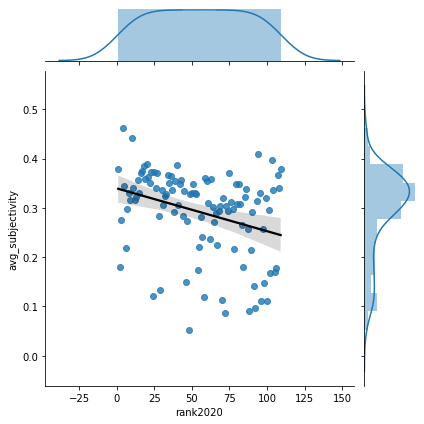

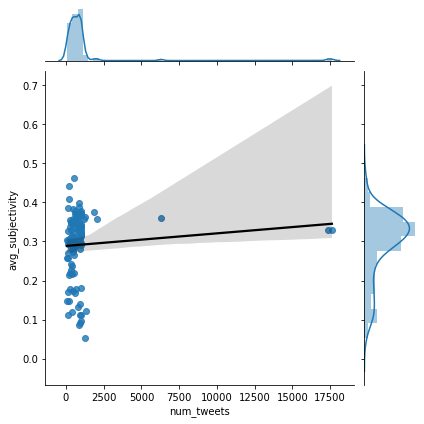

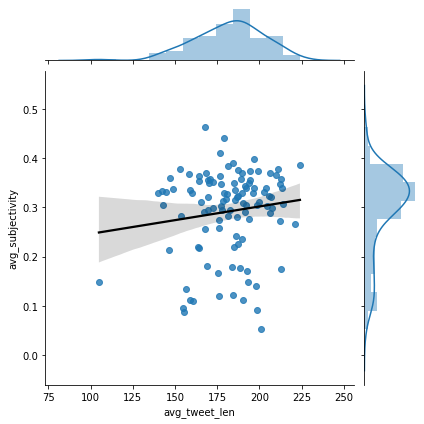

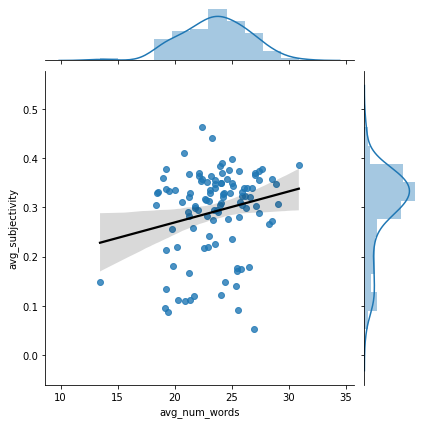

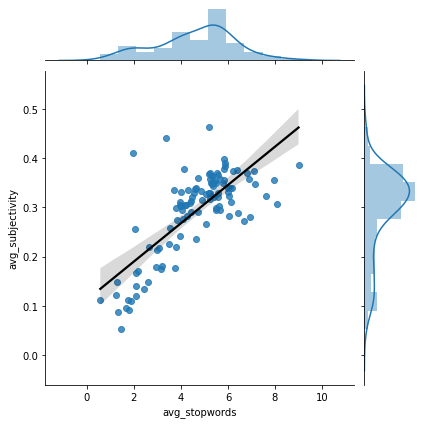

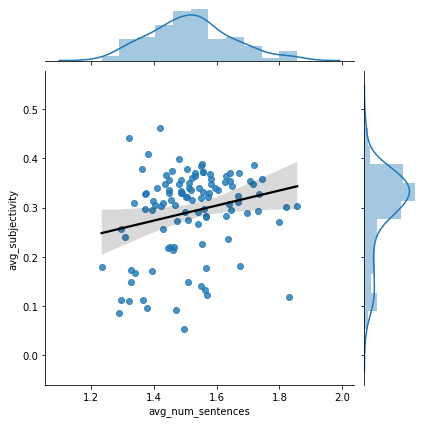

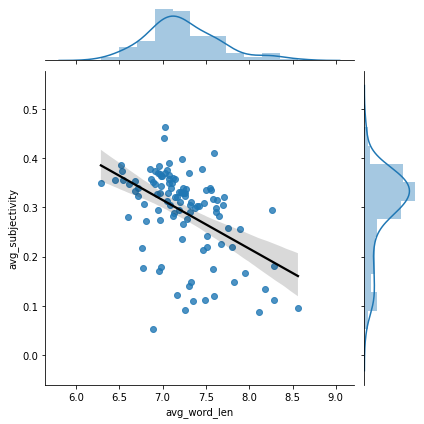

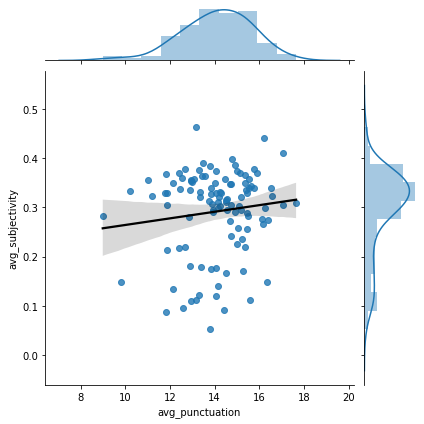

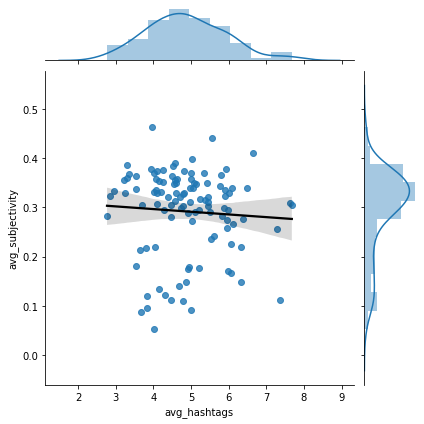

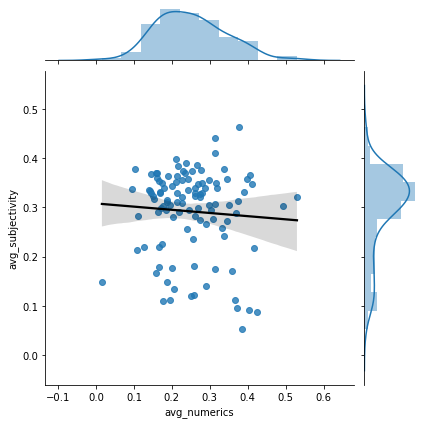

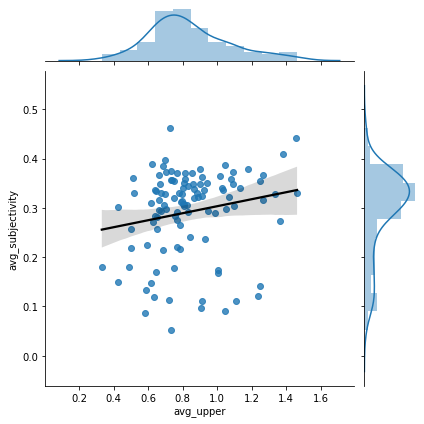

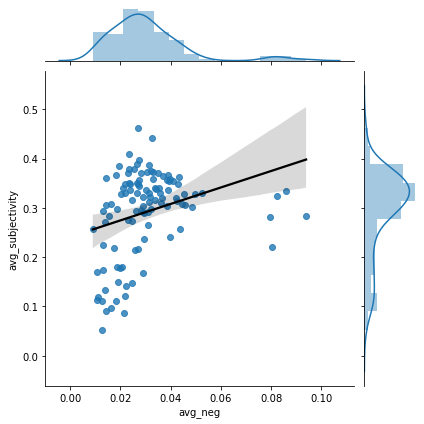

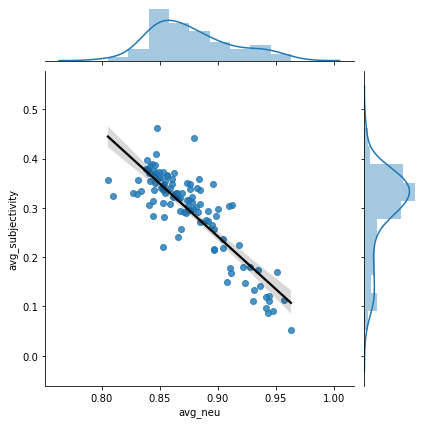

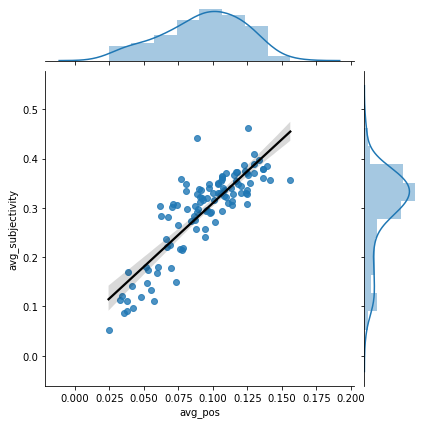

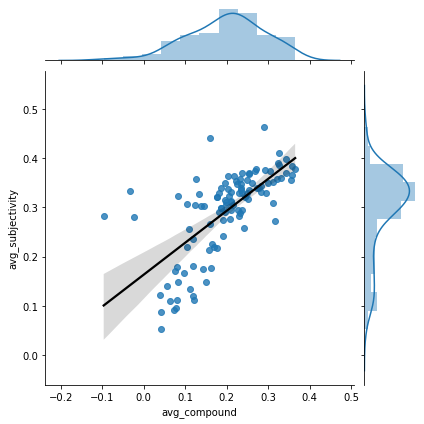

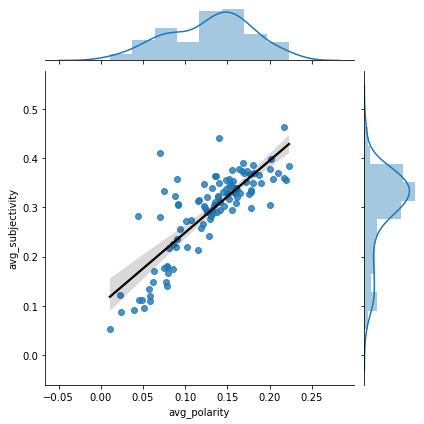

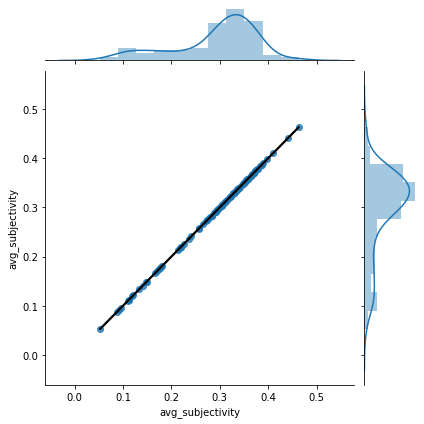

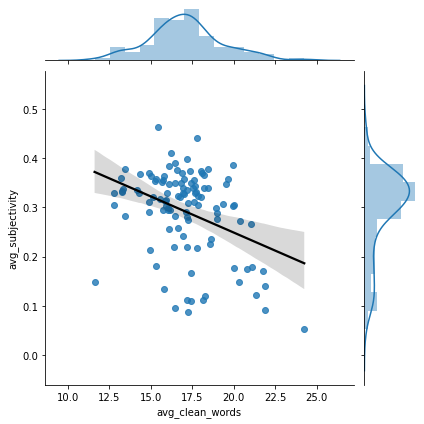

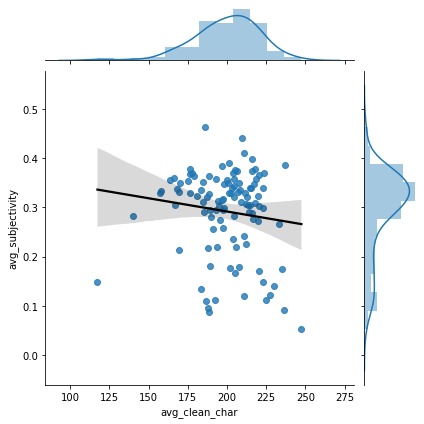

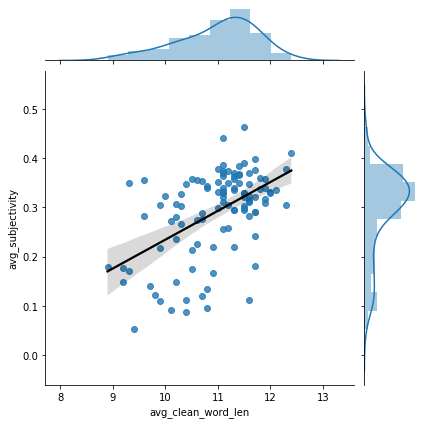

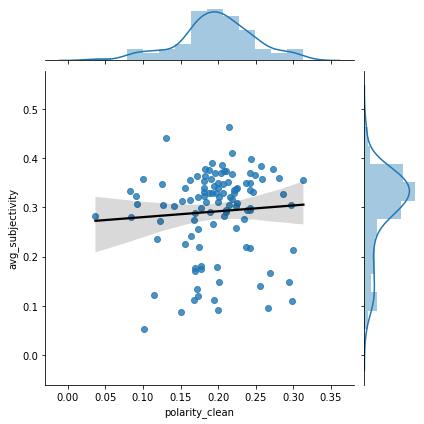

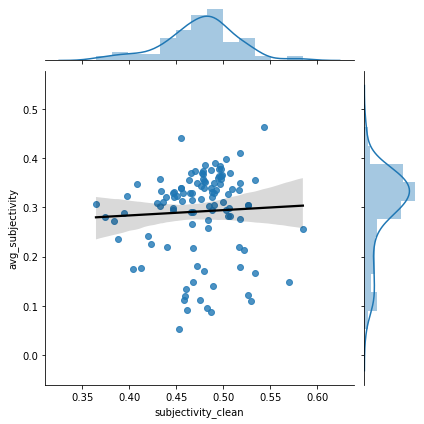

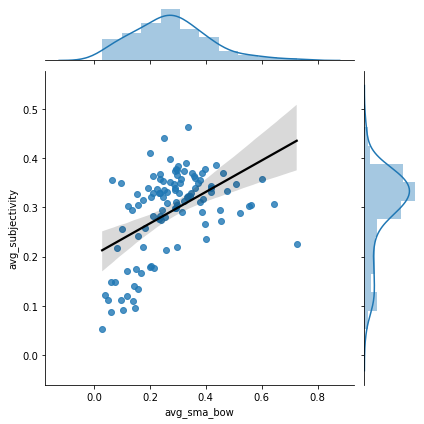

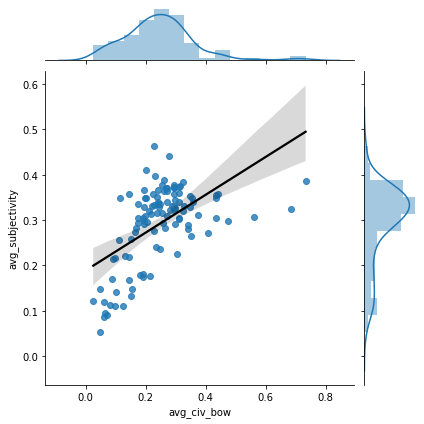

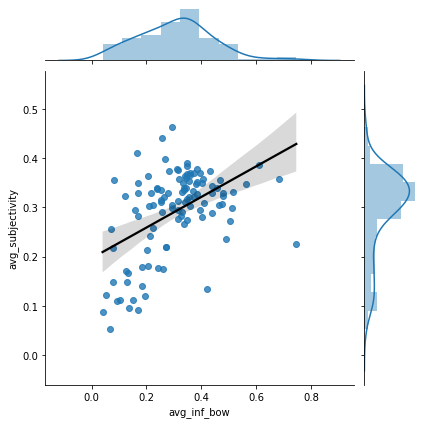

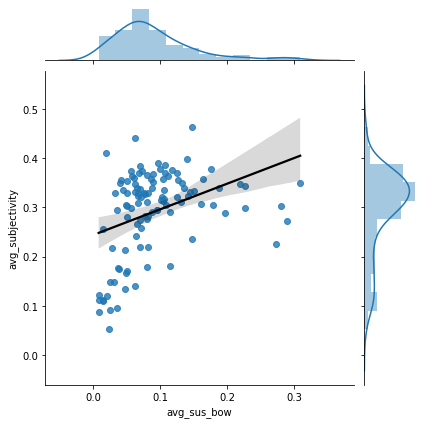

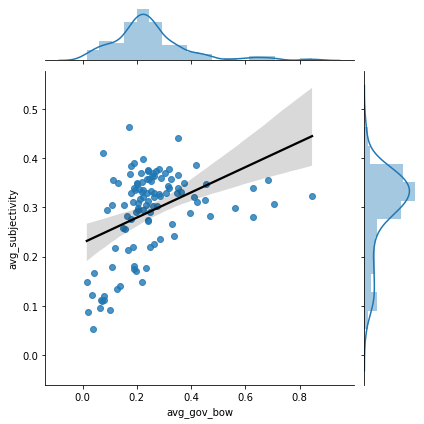

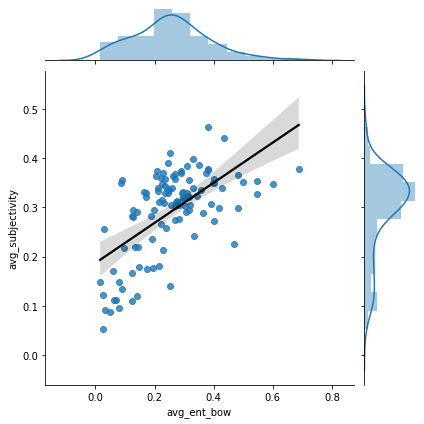

In [8]:
for i, col in enumerate(sc100_numerics.columns):
    plt.figure(i)
    sns.jointplot(x=col, y='avg_subjectivity', data=sc100_numerics, kind='reg',joint_kws={'line_kws':{'color':'black'}})

relationships with total variables are biaised by my 3 case studies since sample sizes are unbalanced.

# 2. Correlations
- check for multicollinearity by using correlation matrixes and heatmaps
- scatter plot the most correlated variables

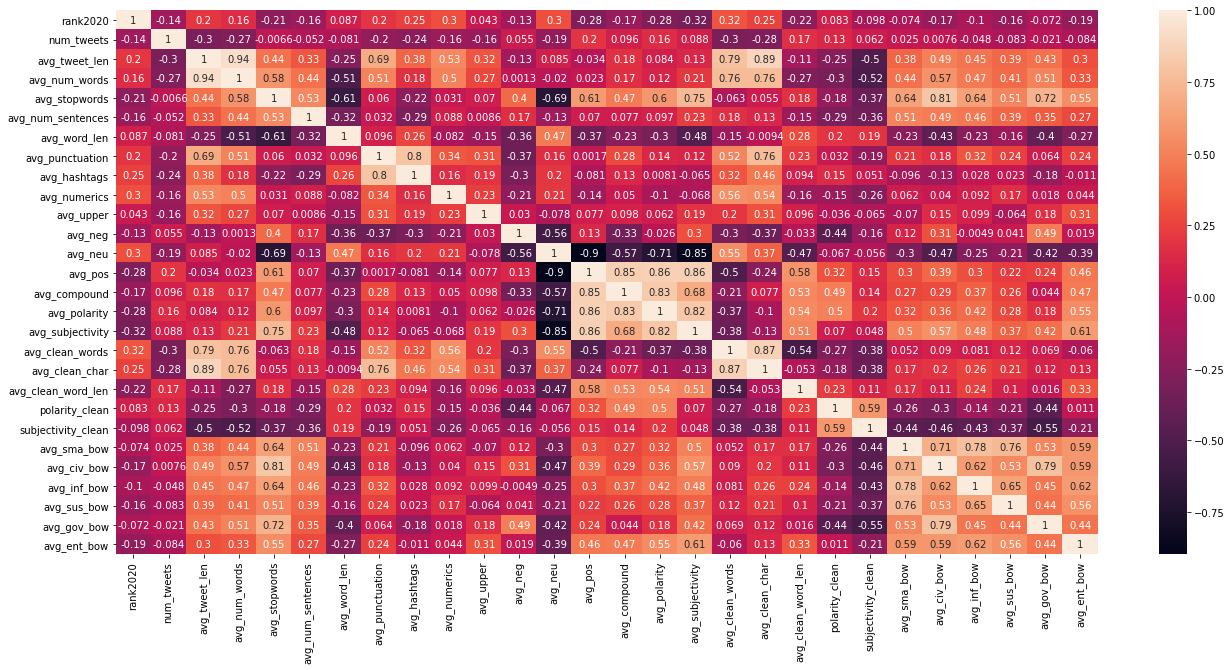

In [9]:
# correlation matrix and heatmap on hypothesis variables
sc100_pearson = sc100_numerics.corr(method='pearson')
plt.figure(figsize=(22,10))
sns.heatmap(sc100_pearson, annot=True)
plt.show()

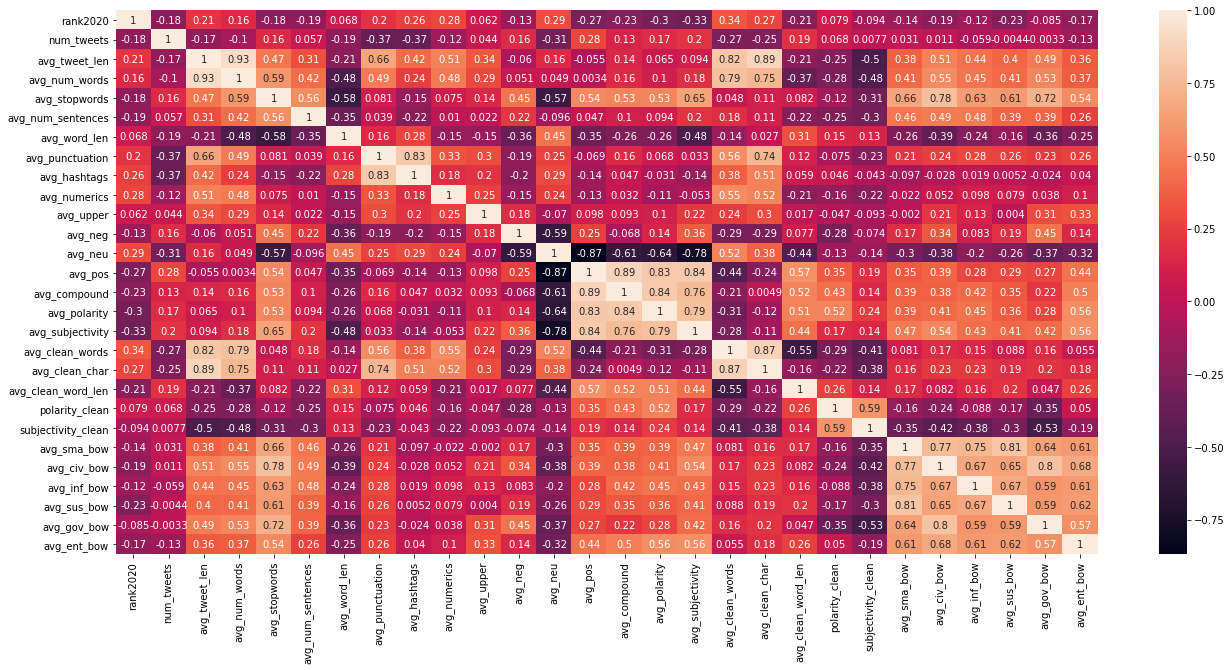

In [10]:
# correlation matrix and heatmap on hypothesis variables
sc100_spearman = sc100_numerics.corr(method='spearman')
plt.figure(figsize=(22,10))
sns.heatmap(sc100_spearman, annot=True)
plt.show()

interval columns not set, guessing: ['rank2020', 'num_tweets', 'avg_tweet_len', 'avg_num_words', 'avg_stopwords', 'avg_num_sentences', 'avg_word_len', 'avg_punctuation', 'avg_hashtags', 'avg_numerics', 'avg_upper', 'avg_neg', 'avg_neu', 'avg_pos', 'avg_compound', 'avg_polarity', 'avg_subjectivity', 'avg_clean_words', 'avg_clean_char', 'avg_clean_word_len', 'polarity_clean', 'subjectivity_clean', 'avg_sma_bow', 'avg_civ_bow', 'avg_inf_bow', 'avg_sus_bow', 'avg_gov_bow', 'avg_ent_bow']


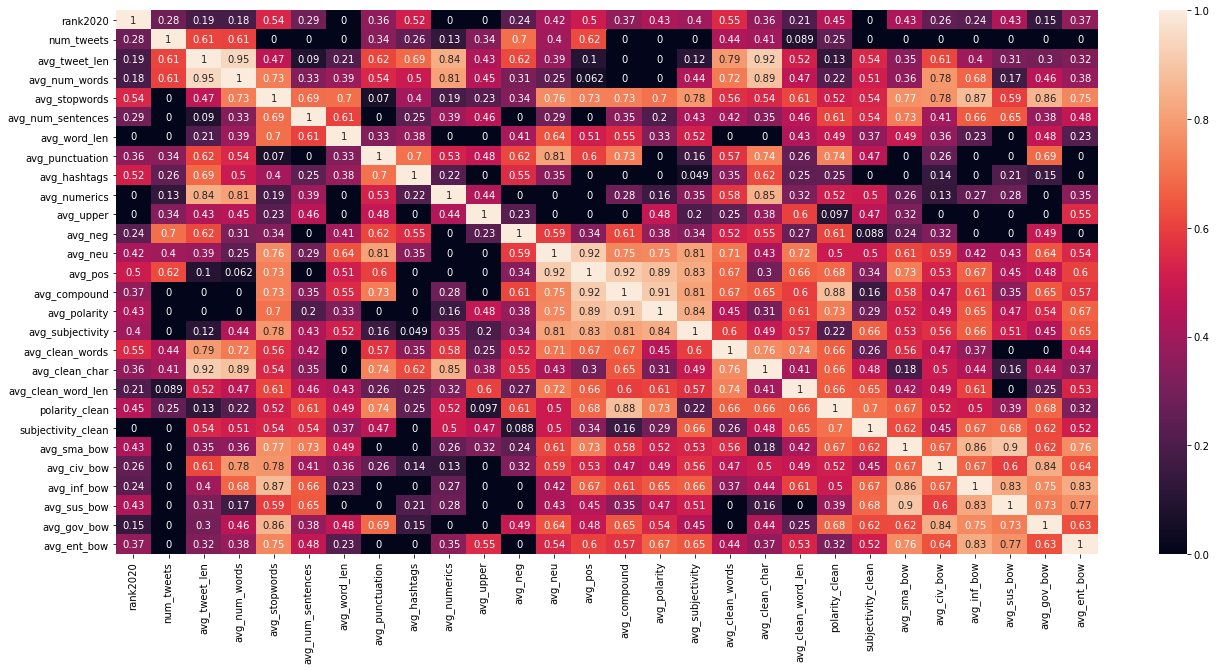

In [11]:
sc100_phik = sc100_numerics.phik_matrix()
plt.figure(figsize=(22,10))
sns.heatmap(sc100_phik, annot=True)
plt.show()

#### standard scale my variables to check if better correlation scores

In [12]:
transformer = StandardScaler().fit(sc100_numerics)
sc100_standardized = transformer.transform(sc100_numerics)

the standard scaling do not give any more results

### will extract the pairs of variables which are correlated


In [13]:
# sorting the correlation matrix
pairs = sc100_pearson.unstack()
sorted_pairs = pairs.sort_values(kind="quicksort")
sorted_pairs

avg_neu             avg_pos              -0.896132
avg_pos             avg_neu              -0.896132
avg_subjectivity    avg_neu              -0.853130
avg_neu             avg_subjectivity     -0.853130
avg_polarity        avg_neu              -0.708213
avg_neu             avg_polarity         -0.708213
avg_stopwords       avg_neu              -0.688783
avg_neu             avg_stopwords        -0.688783
avg_word_len        avg_stopwords        -0.613653
avg_stopwords       avg_word_len         -0.613653
avg_neu             avg_compound         -0.566953
avg_compound        avg_neu              -0.566953
avg_neg             avg_neu              -0.558711
avg_neu             avg_neg              -0.558711
avg_gov_bow         subjectivity_clean   -0.554705
subjectivity_clean  avg_gov_bow          -0.554705
avg_clean_word_len  avg_clean_words      -0.539209
avg_clean_words     avg_clean_word_len   -0.539209
avg_num_words       subjectivity_clean   -0.515743
subjectivity_clean  avg_num_wor

Coefficients greater than 0.5 expresses strongly correlated variables. 

Coefficients of 1.0 correlation are symetrical peering and can be ignored.

The most non-correlated variables (lesser than 0.001) can be meaningful as well since they express a strong non-correlation.

In [14]:
# selecting strong correlation pairs (greater than 0.5 ; ignore == 1.0)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
corr_pairs = strong_pairs[abs(strong_pairs) < 1.0]
corr_pairs

avg_neu             avg_pos              -0.896132
avg_pos             avg_neu              -0.896132
avg_subjectivity    avg_neu              -0.853130
avg_neu             avg_subjectivity     -0.853130
avg_polarity        avg_neu              -0.708213
avg_neu             avg_polarity         -0.708213
avg_stopwords       avg_neu              -0.688783
avg_neu             avg_stopwords        -0.688783
avg_word_len        avg_stopwords        -0.613653
avg_stopwords       avg_word_len         -0.613653
avg_neu             avg_compound         -0.566953
avg_compound        avg_neu              -0.566953
avg_neg             avg_neu              -0.558711
avg_neu             avg_neg              -0.558711
avg_gov_bow         subjectivity_clean   -0.554705
subjectivity_clean  avg_gov_bow          -0.554705
avg_clean_word_len  avg_clean_words      -0.539209
avg_clean_words     avg_clean_word_len   -0.539209
avg_num_words       subjectivity_clean   -0.515743
subjectivity_clean  avg_num_wor

#### most total variables are correlated since they express quantities of attributes and depends necessarily on quantities of tweets

#### sentiment scores will be correlated too since a tweet can't be both positive and negative. Idem for neutral in between. 

#### negative correlations :
- avg_subjectivity    avg_neu              -0.853130
- avg_polarity        avg_neu              -0.708213
- avg_neu             avg_stopwords        -0.688783
- avg_word_len        avg_stopwords        -0.613653 (stopwords tends to reduce average word length of a tweet) 
- subjectivity_clean  avg_gov_bow          -0.554705
- subjectivity_clean  avg_num_words        -0.515743
- avg_word_len        avg_num_words        -0.513053

#### positive correlations :
- avg_gov_bow         avg_num_words         0.505110
- avg_num_words       avg_punctuation       0.510294
- avg_sma_bow         avg_num_sentences     0.510428
- avg_sus_bow         avg_stopwords         0.513860
- avg_subjectivity    avg_clean_word_len    0.514730
- avg_gov_bow         avg_sma_bow           0.525957
- avg_compound        avg_clean_word_len    0.530800
- avg_tweet_len       avg_numerics          0.532307
- avg_stopwords       avg_num_sentences     0.533262
- avg_sus_bow         avg_civ_bow           0.534725
- avg_polarity        avg_clean_word_len    0.539294
- avg_polarity        avg_ent_bow           0.547133
- avg_ent_bow         avg_stopwords         0.551117
- avg_ent_bow         avg_sus_bow           0.556381
- avg_subjectivity    avg_civ_bow           0.569971
- avg_civ_bow         avg_num_words         0.572016
- avg_stopwords       avg_num_words         0.582051
- avg_pos             avg_clean_word_len    0.583023
- subjectivity_clean  polarity_clean        0.585445
- avg_sma_bow         avg_ent_bow           0.588189
- avg_civ_bow         avg_ent_bow           0.594120
- avg_polarity        avg_stopwords         0.597448
- avg_pos             avg_stopwords         0.608451
- avg_subjectivity    avg_ent_bow           0.614963
- avg_inf_bow         avg_civ_bow           0.617140
- avg_ent_bow         avg_inf_bow           0.621843
- avg_inf_bow         avg_stopwords         0.638649
- avg_sma_bow         avg_stopwords         0.640425
- avg_sus_bow         avg_inf_bow           0.651455
- avg_subjectivity    avg_compound          0.684727
- avg_punctuation     avg_tweet_len         0.688595
- avg_sma_bow         avg_civ_bow           0.705087
- avg_gov_bow         avg_stopwords         0.721832
- avg_subjectivity    avg_stopwords         0.749856
- avg_sma_bow         avg_sus_bow           0.755111
- avg_sma_bow         avg_inf_bow           0.784223
- avg_gov_bow         avg_civ_bow           0.787394
- avg_hashtags        avg_punctuation       0.801872
- avg_civ_bow         avg_stopwords         0.808590
- avg_subjectivity    avg_polarity          0.818848
- avg_compound        avg_polarity          0.834813
- avg_pos             avg_compound          0.854191
- avg_subjectivity    avg_pos               0.860099
- avg_polarity        avg_pos               0.860404
- avg_tweet_len       avg_num_words         0.939738

In [15]:
# stocking highly un-correlated pairs (-0.01 < x < 0.01)
weak_pair = sorted_pairs[abs(sorted_pairs) > -0.01]
uncorr_pair = weak_pair[abs(weak_pair) < 0.01]
uncorr_pair

avg_clean_char     avg_word_len        -0.009367
avg_word_len       avg_clean_char      -0.009367
num_tweets         avg_stopwords       -0.006571
avg_stopwords      num_tweets          -0.006571
avg_neg            avg_inf_bow         -0.004900
avg_inf_bow        avg_neg             -0.004900
avg_num_words      avg_neg              0.001309
avg_neg            avg_num_words        0.001309
avg_pos            avg_punctuation      0.001693
avg_punctuation    avg_pos              0.001693
num_tweets         avg_civ_bow          0.007597
avg_civ_bow        num_tweets           0.007597
avg_hashtags       avg_polarity         0.008059
avg_polarity       avg_hashtags         0.008059
avg_num_sentences  avg_upper            0.008585
avg_upper          avg_num_sentences    0.008585
dtype: float64

#### uncorrelated variables
- avg_gov_bow         upper_total          -0.009172
- avg_gov_bow         words_total          -0.007740
- avg_stopwords       num_tweets           -0.006571
- avg_stopwords       clean_char_total     -0.006308
- avg_stopwords       hashtags_total       -0.004946
- avg_neg             avg_inf_bow          -0.004900
- avg_sma_bow         numerics_total       -0.002974
- avg_civ_bow         clean_words_total    -0.001651
- avg_stopwords       punctuation_total    -0.001460
- subjectivity_clean  sus_bow              -0.001180
- avg_civ_bow         hashtags_total       -0.000304
- avg_stopwords       upper_total           0.001131
- avg_neg             avg_num_words         0.001309
- avg_pos             avg_punctuation       0.001693
- avg_civ_bow         clean_char_total      0.004496
- avg_inf_bow         stopwords_total       0.005617
- avg_civ_bow         punctuation_total     0.007543
- avg_civ_bow         num_tweets            0.007597
- avg_polarity        avg_hashtags          0.008059
- avg_num_sentences   avg_upper             0.008585
- avg_civ_bow         upper_total           0.008847
- avg_sma_bow         upper_total           0.009812

## Is rank2020 variable relevant to classify citizen engagement ?

In [ ]:
plt.scatter(sc100_features['rank2020'], sc100_features['avg_pos'], color='red')
plt.title('rank2020 Vs avg_pos', fontsize=14)
plt.xlabel('rank2020', fontsize=14)
plt.ylabel('avg_pos', fontsize=14)
plt.grid(True)
plt.show()
# no

## as a matter of comparison, is average weight if civictech bow relevant to it ?

In [ ]:
plt.scatter(sc100_features['avg_civ_bow'], sc100_features['avg_pos'], color='red')
plt.title('avg_civ_bow Vs avg_pos', fontsize=14)
plt.xlabel('avg_civ_bow', fontsize=14)
plt.ylabel('avg_pos', fontsize=14)
plt.grid(True)
plt.show()

# 3. Regression analysis 
- investigate the relevancy of my two target variables (average subjectivity and average entrepreneurship bow weight) in a predictive model including other variables.

In [129]:
# define 2 (X-y axes) to check my 2 target variables of interest
X1 = sc100_numerics.drop(['avg_subjectivity'],axis=1)
y1 = sc100_numerics['avg_subjectivity']

# the one BoW having best correlation scores overall is avg_ent_bow
X2 = sc100_numerics.drop(['avg_ent_bow'],axis=1)
y2 = sc100_numerics['avg_ent_bow']

In [131]:
lin_reg = LinearRegression()
model1 = lin_reg.fit(X1,y1)
y_pred1 = model1.predict(X1)

print('\nIntercept of model',model1.intercept_)

MAE = mean_absolute_error(y1,y_pred1)
MSE = mean_squared_error(y1,y_pmultired1)
RMSE = np.sqrt(MSE)
R2 = r2_score(y1,y_pred1)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.5f" % (R2))


Intercept of model -349.95253906995276
The mean absolute error of the model in the test set is:   0.01
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.02
The R2 of the model in the test set is: 0.94746


the R2 value is close to 1 so the model will make good predictions. 

In [85]:
coeff_df1 = pd.DataFrame(model1.coef_, X1.columns, columns=['Coefficient'])
print(coeff_df1)

                    Coefficient
rank2020              -0.000027
num_tweets            -0.000002
avg_tweet_len          0.000872
avg_num_words         -0.009745
avg_stopwords          0.011715
avg_num_sentences     -0.047497
avg_word_len          -0.027231
avg_punctuation        0.019829
avg_hashtags          -0.013234
avg_numerics           0.063036
avg_upper              0.032733
avg_neg              350.752478
avg_neu              350.029139
avg_pos              350.679993
avg_compound           0.103010
avg_polarity           0.702224
avg_clean_words        0.006309
avg_clean_char        -0.001416
avg_clean_word_len     0.005865
polarity_clean        -0.479915
subjectivity_clean     0.484830
avg_sma_bow            0.139649
avg_civ_bow            0.010269
avg_inf_bow           -0.020489
avg_sus_bow           -0.096709
avg_gov_bow           -0.017253
avg_ent_bow            0.025345


In [86]:
df1 = pd.DataFrame({'Actual': y1, 'Predicted': y_pred1})
print(df1)

       Actual  Predicted
0    0.349085   0.348124
1    0.365899   0.376127
2    0.316410   0.323043
3    0.241076   0.282325
4    0.320793   0.307363
5    0.462777   0.435087
6    0.320583   0.284864
7    0.328314   0.333572
8    0.307024   0.310831
9    0.331053   0.344223
10   0.291195   0.301377
11   0.121642   0.138886
12   0.386500   0.412703
13   0.096253   0.098760
14   0.112158   0.101860
15   0.364587   0.370916
16   0.311515   0.297133
17   0.356588   0.359355
18   0.354920   0.360322
19   0.257404   0.246994
20   0.297968   0.300090
21   0.091542   0.096898
22   0.148726   0.145715
23   0.177380   0.185100
24   0.397890   0.370838
25   0.304216   0.288862
26   0.305600   0.341568
27   0.302217   0.296510
28   0.219160   0.203479
29   0.351497   0.363831
30   0.357150   0.379532
31   0.367514   0.335369
32   0.322470   0.325886
33   0.298246   0.295387
34   0.304935   0.309065
35   0.293830   0.261760
36   0.349676   0.350921
37   0.271695   0.269867
38   0.179475   0.163055


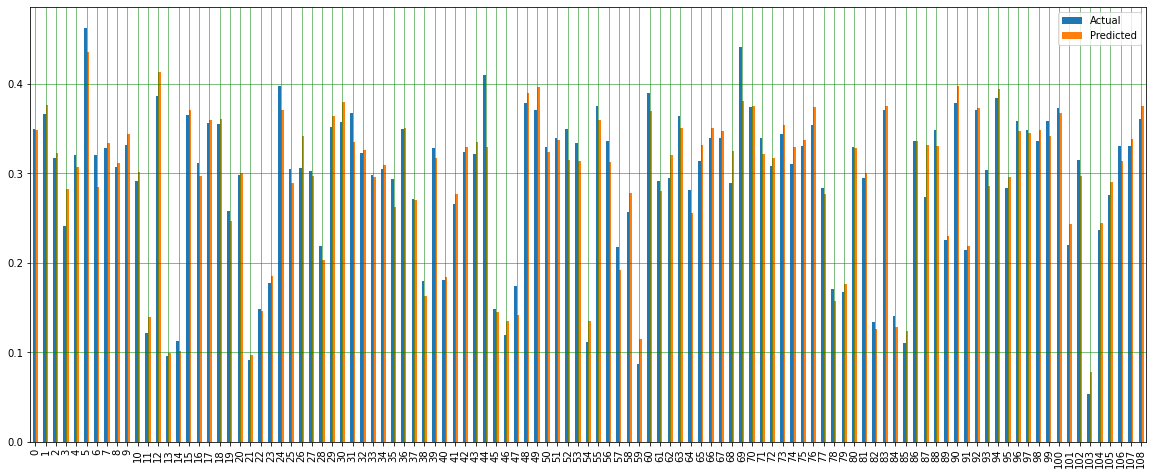

In [87]:
df1.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

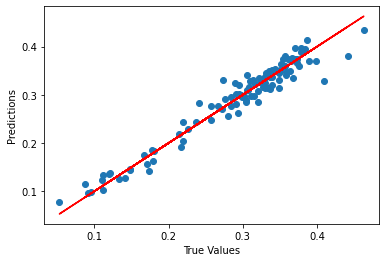

In [88]:
plt.scatter(y1, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y1,y1,'r')

In [132]:
lin_reg = LinearRegression()
model2 = lin_reg.fit(X2,y2)
y_pred2 = model1.predict(X2)

print('\nIntercept of model',model2.intercept_)

MAE2 = mean_absolute_error(y2,y_pred2)
MSE2 = mean_squared_error(y2,y_pred2)
RMSE2 = np.sqrt(MSE)
R22 = r2_score(y2,y_pred2)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE2))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE2))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE2))
print("The R2 of the model in the test set is: %4.5f" % (R22))


Intercept of model -796.9153788968592
The mean absolute error of the model in the test set is:   4.00
The mean squared error of the model in the test set is:  16.18
The root mean squared error of the model in the test set is:   0.02
The R2 of the model in the test set is: -960.34354


In [118]:
coeff_df2 = pd.DataFrame(model2.coef_, X2.columns, columns=['Coefficient'])
print(coeff_df2)

                    Coefficient
rank2020              -0.000293
num_tweets            -0.000005
avg_tweet_len         -0.001592
avg_num_words          0.093292
avg_stopwords         -0.141691
avg_num_sentences      0.093829
avg_word_len          -0.028904
avg_punctuation       -0.038296
avg_hashtags           0.023853
avg_numerics           0.045904
avg_upper              0.085946
avg_neg              987.329516
avg_neu              987.858665
avg_pos              986.081173
avg_compound           0.318231
avg_polarity           1.037135
avg_subjectivity       0.189616
avg_clean_words       -0.024206
avg_clean_char        -0.004656
avg_clean_word_len     0.128025
polarity_clean         0.016024
subjectivity_clean     0.116968
avg_sma_bow            0.172724
avg_civ_bow            0.462336
avg_inf_bow            0.088951
avg_sus_bow            0.494226
avg_gov_bow            0.294102


In [135]:
df2 = pd.DataFrame({'Actual': y2, 'Predicted': y_pred2})
print(df2)

       Actual  Predicted
0    0.402644  -3.698872
1    0.480676  -3.689391
2    0.295000  -4.165692
3    0.332268  -4.014123
4    0.317000  -3.953913
5    0.381387  -3.954761
6    0.171000  -4.173604
7    0.169456  -4.093073
8    0.390203  -3.386359
9    0.297000  -3.690597
10   0.305000  -4.163805
11   0.024664  -3.208888
12   0.351145  -3.479613
13   0.078000  -3.845042
14   0.071000  -3.665002
15   0.262673  -3.992960
16   0.273077  -3.749291
17   0.091346  -3.128099
18   0.318008  -3.538188
19   0.238095  -3.873185
20   0.483871  -3.989273
21   0.033262  -3.246698
22   0.015625  -3.483318
23   0.195231  -2.991873
24   0.329571  -3.860223
25   0.255245  -3.251313
26   0.281147  -4.529033
27   0.267857  -3.347069
28   0.132743  -3.809903
29   0.499145  -3.783585
30   0.268759  -4.085435
31   0.270021  -4.037588
32   0.343035  -3.900594
33   0.416955  -3.595320
34   0.321429  -3.684024
35   0.317365  -4.017277
36   0.398148  -3.856226
37   0.400000  -3.294459
38   0.148305  -2.836383


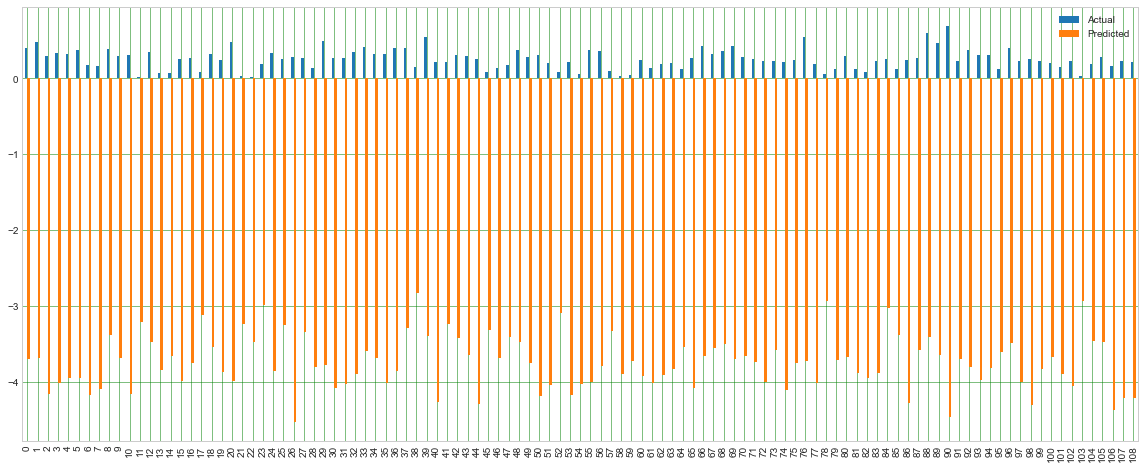

In [136]:
df2.plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

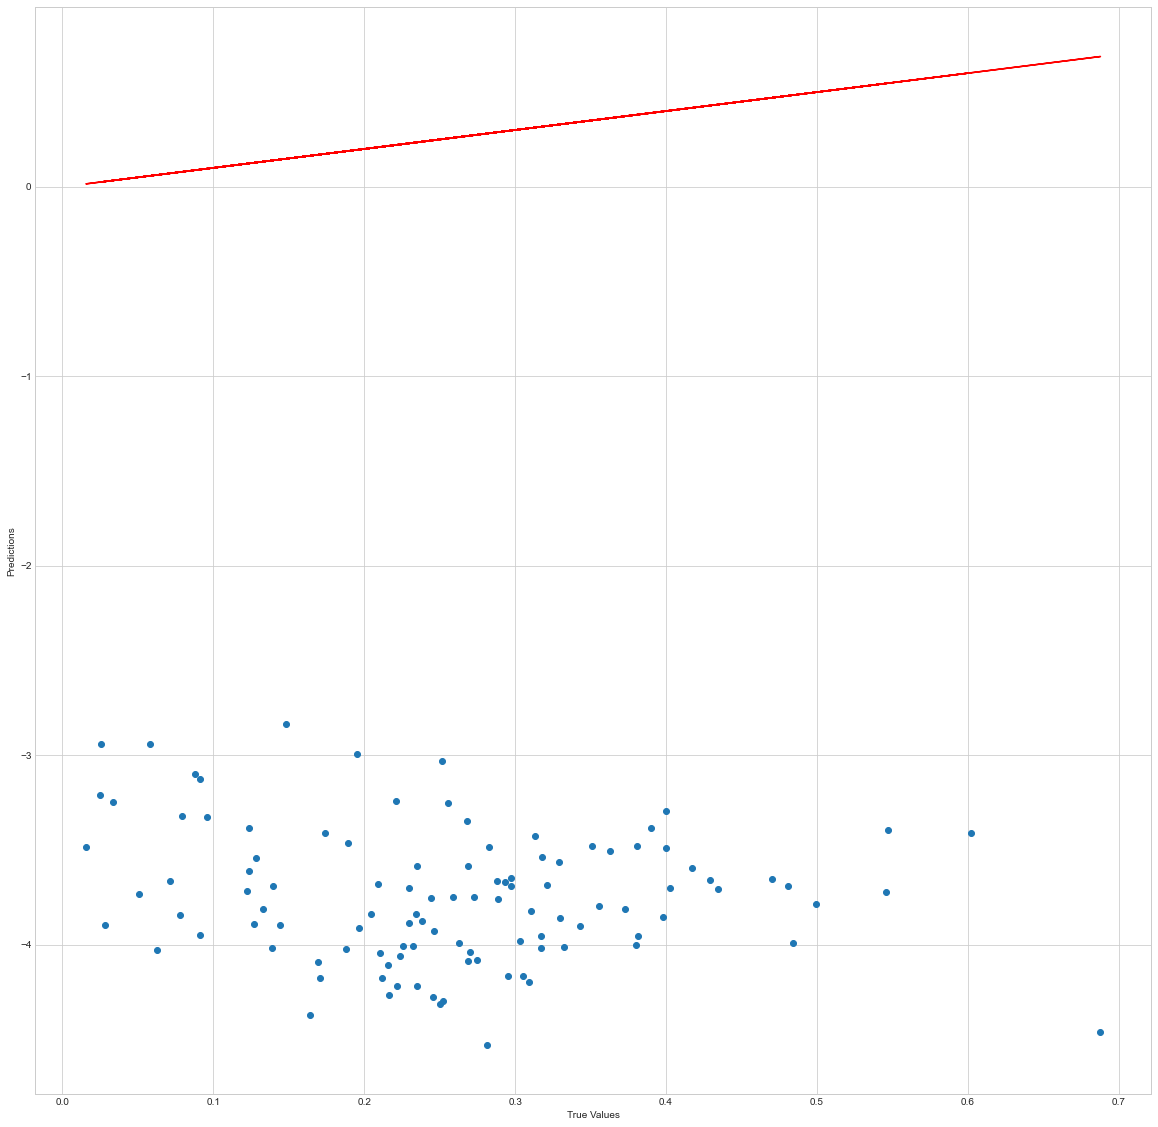

In [137]:
plt.scatter(y2, y_pred2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot(y2,y2,'r')

My linear regression model can't predict more than 33 values with target variable avg_ent_bow, while there are no null values in the dataset

In [95]:
# check OLS results
import statsmodels.api as sm
from termcolor import colored as cl

model3 = sm.OLS(y1, X1) # Ordinary Least Squares 
mlr_reg = model3.fit()


print(cl(mlr_reg.summary(),attrs = ['bold']))

                                 OLS Regression Results                                
Dep. Variable:       avg_subjectivity   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              700.3
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                    5.79e-86
Time:                        20:52:12   Log-Likelihood:                          271.78
No. Observations:                 109   AIC:                                     -489.6
Df Residuals:                      82   BIC:                                     -416.9
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [128]:
# check OLS results
import statsmodels.api as sm
from termcolor import colored as cl

model4 = sm.OLS(y2, X2) # Ordinary Least Squares 
mlr_reg = model4.fit()


print(cl(mlr_reg.summary(),attrs = ['bold']))

                                 OLS Regression Results                                
Dep. Variable:            avg_ent_bow   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              51.85
Date:                Fri, 29 Jan 2021   Prob (F-statistic):                    7.92e-41
Time:                        22:12:05   Log-Likelihood:                          138.86
No. Observations:                 109   AIC:                                     -223.7
Df Residuals:                      82   BIC:                                     -151.0
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

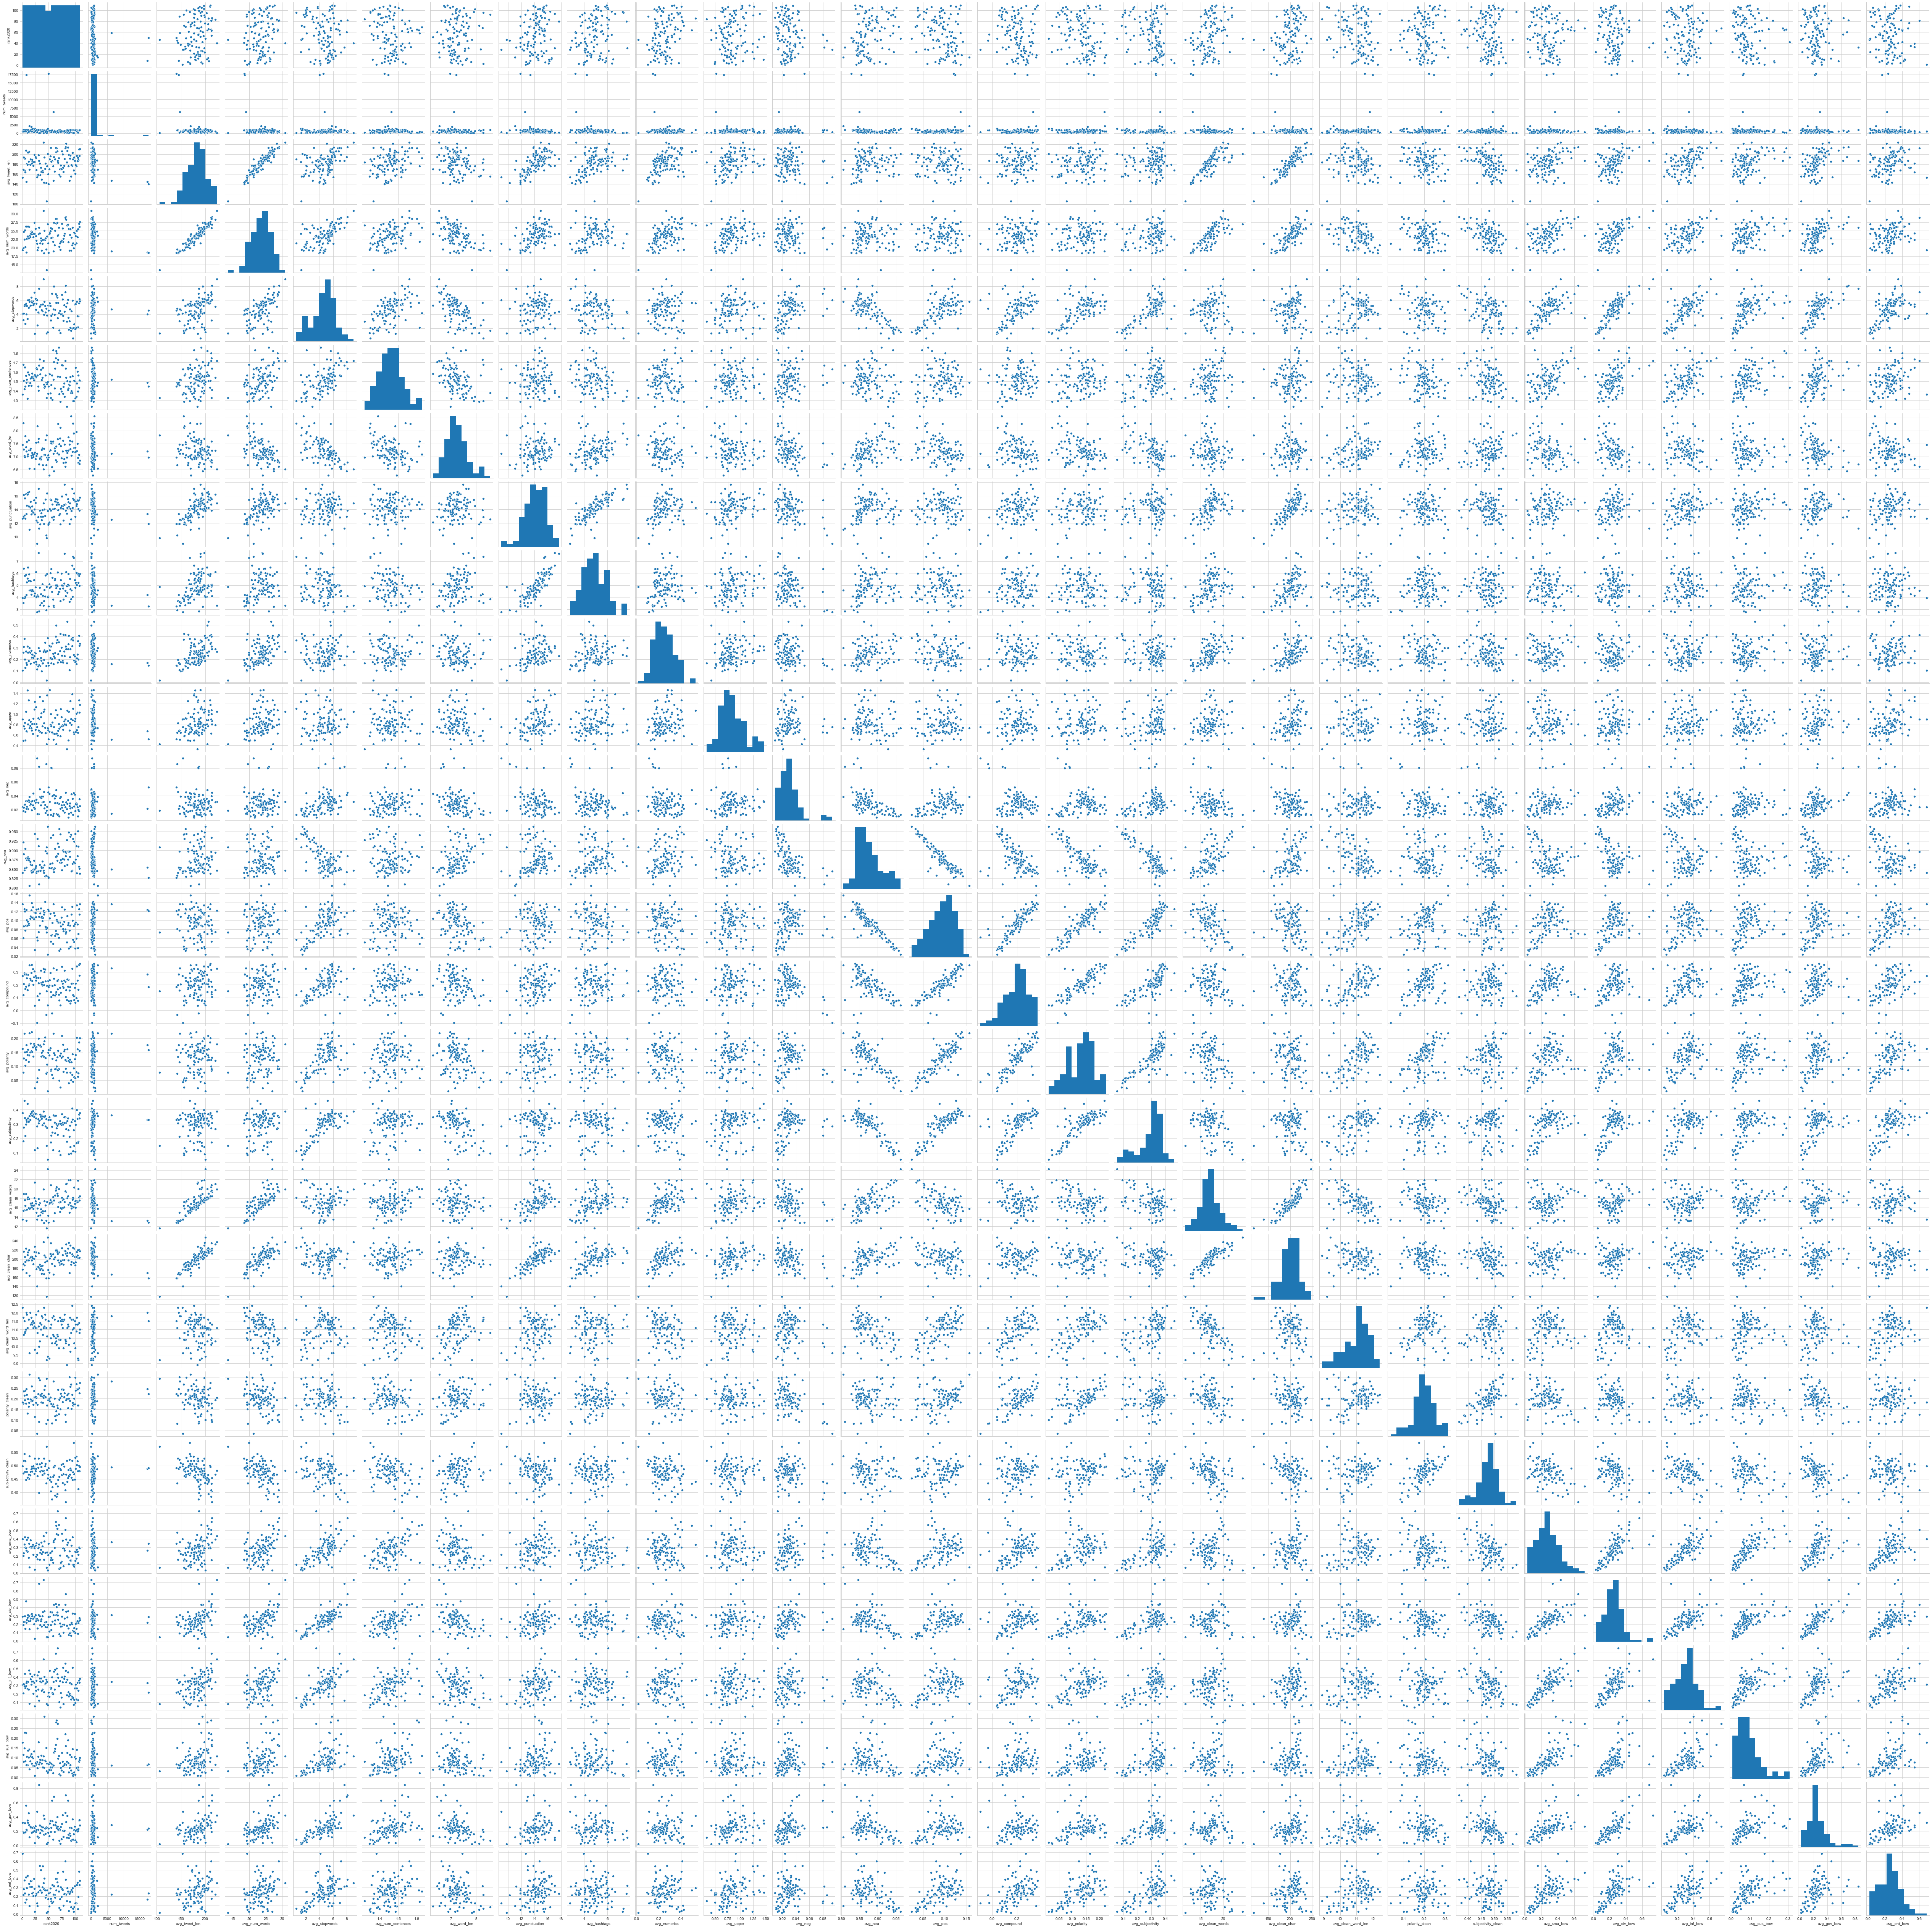

In [99]:
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,20)
sb.pairplot(sc100_numerics)
plt.savefig('pairplor.png')

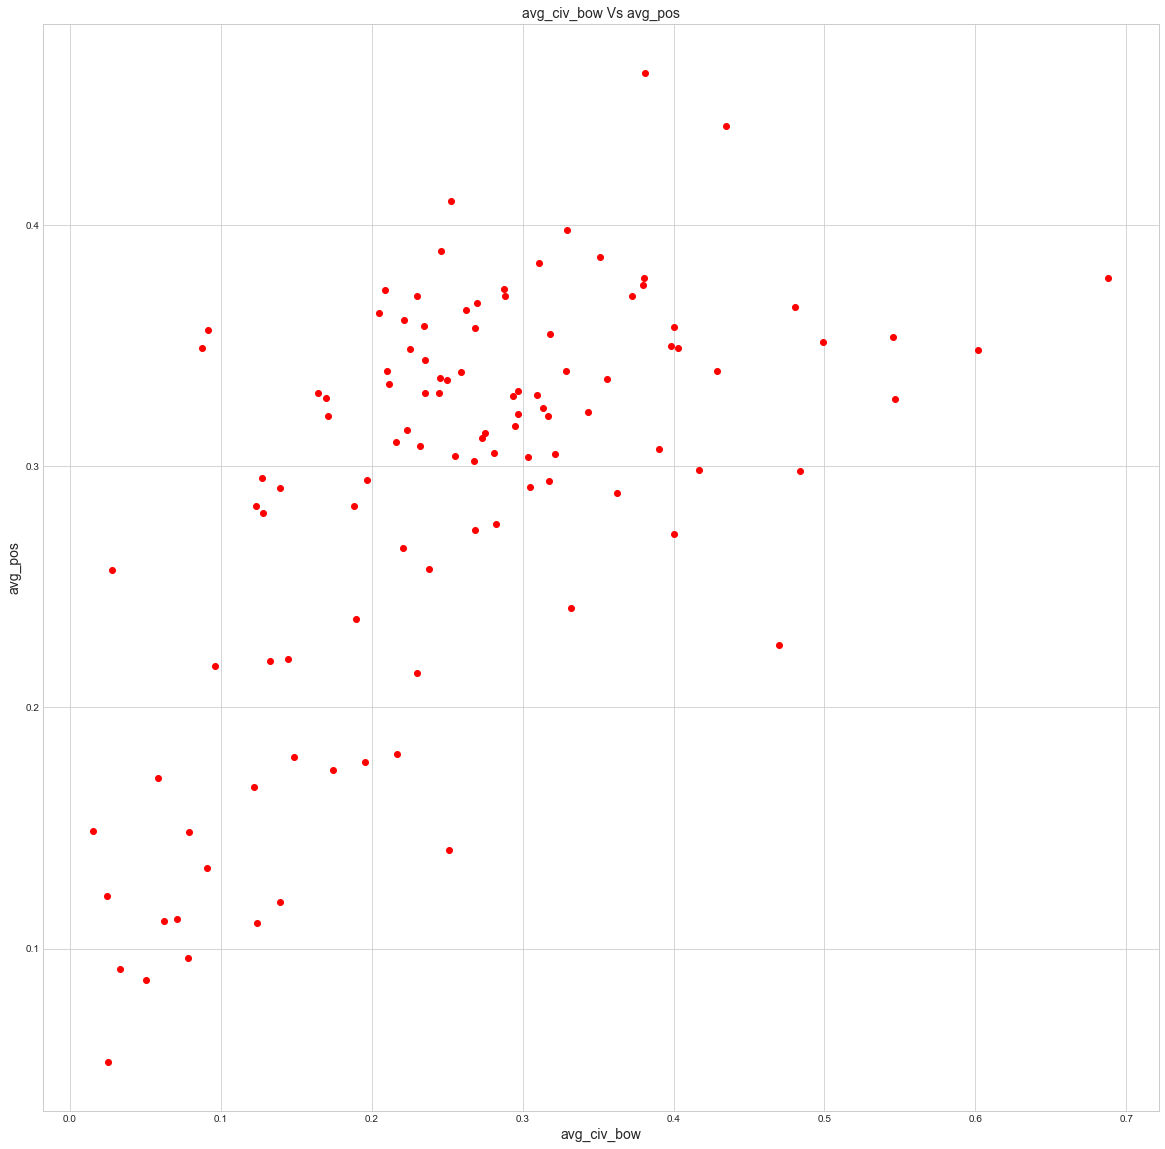

In [141]:
plt.scatter(sc100_features['avg_ent_bow'], sc100_features['avg_subjectivity'], color='red')
plt.title('avg_civ_bow Vs avg_pos', fontsize=14)
plt.xlabel('avg_civ_bow', fontsize=14)
plt.ylabel('avg_pos', fontsize=14)
plt.grid(True)
plt.show()

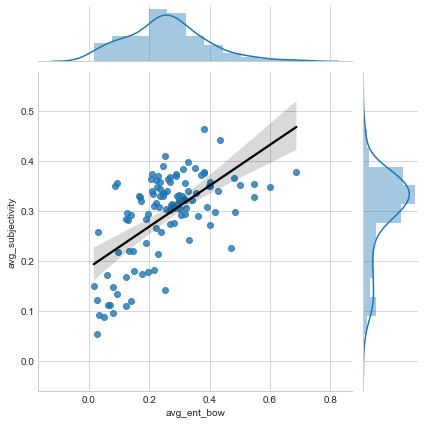

In [139]:
sns.jointplot(x='avg_ent_bow', y='avg_subjectivity', data=sc100_numerics, kind='reg',joint_kws={'line_kws':{'color':'black'}})

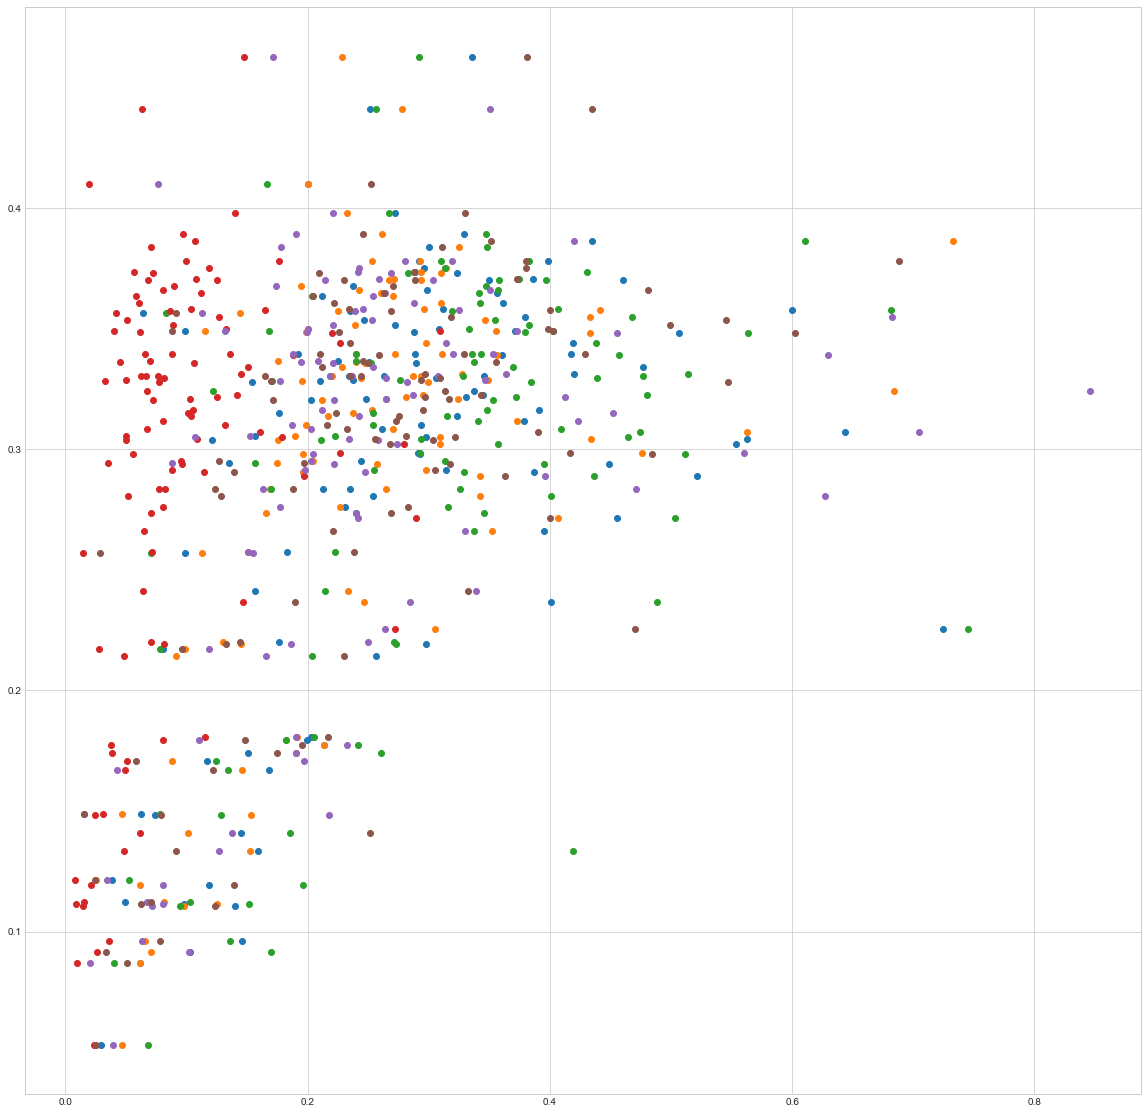

In [151]:
plt.scatter(sc100_numerics["avg_sma_bow"], sc100_numerics["avg_subjectivity"])
plt.scatter(sc100_numerics["avg_civ_bow"], sc100_numerics["avg_subjectivity"])
plt.scatter(sc100_numerics["avg_inf_bow"], sc100_numerics["avg_subjectivity"])
plt.scatter(sc100_numerics["avg_sus_bow"], sc100_numerics["avg_subjectivity"])
plt.scatter(sc100_numerics["avg_gov_bow"], sc100_numerics["avg_subjectivity"])
plt.scatter(sc100_numerics["avg_ent_bow"], sc100_numerics["avg_subjectivity"])
plt.show()

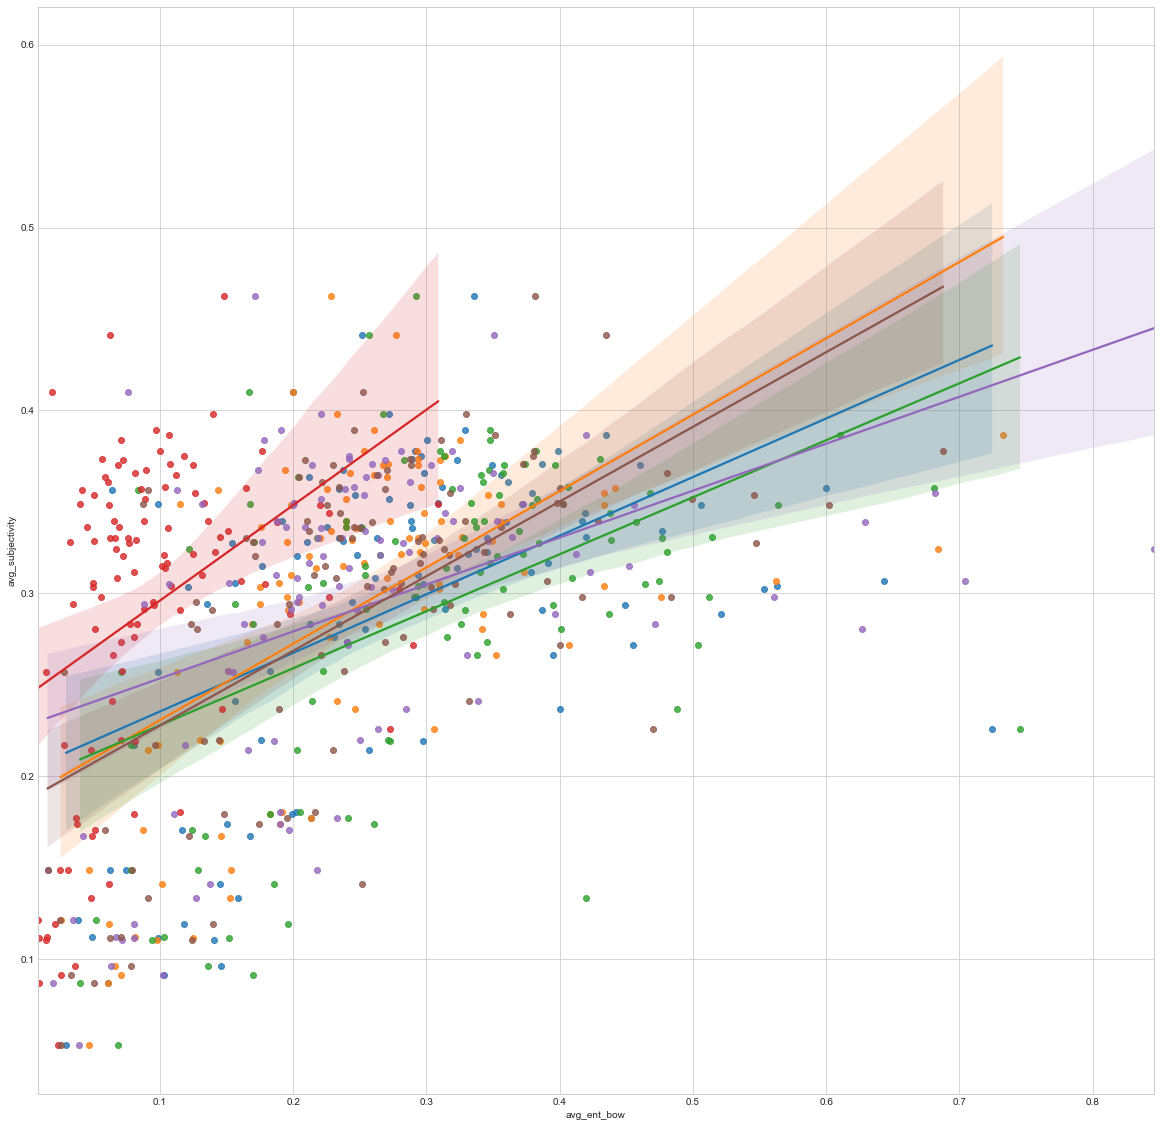

In [154]:
sns.regplot(sc100_numerics["avg_sma_bow"], sc100_numerics["avg_subjectivity"])
sns.regplot(sc100_numerics["avg_civ_bow"], sc100_numerics["avg_subjectivity"])
sns.regplot(sc100_numerics["avg_inf_bow"], sc100_numerics["avg_subjectivity"])
sns.regplot(sc100_numerics["avg_sus_bow"], sc100_numerics["avg_subjectivity"])
sns.regplot(sc100_numerics["avg_gov_bow"], sc100_numerics["avg_subjectivity"])
sns.regplot(sc100_numerics["avg_ent_bow"], sc100_numerics["avg_subjectivity"])

#### compare linear regression models accuracies with x_rfe and x_pca

# 4. Test selected features performance on Linear regression models
correlation does not imply causation. 
- which variables affects the other
- cause and effect

# with RFE

In [24]:
Xrfe_train, Xrfe_test, yrfe_train, yrfe_test = train_test_split(X_rfe, y1, test_size = 0.3, random_state = 100)

In [25]:
lm = linear_model.LinearRegression()
lm_rfe = lm.fit(Xrfe_train, yrfe_train)
predictions_rfe = lm_rfe.predict(Xrfe_test)

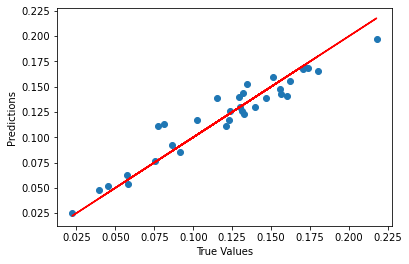

In [26]:
plt.scatter(yrfe_test, predictions_rfe)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot(yrfe_test,yrfe_test,'r')

In [27]:
MAE = mean_absolute_error(yrfe_test,predictions_rfe)
MSE = mean_squared_error(yrfe_test,predictions_rfe)
RMSE = np.sqrt(MSE)
R2 = r2_score(yrfe_test,predictions_rfe)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.5f" % (R2))

The mean absolute error of the model in the test set is:   0.01
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.01
The R2 of the model in the test set is: 0.91729


In [28]:
#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(Xrfe_train,yrfe_train)
rfetree_predictions = rf.predict(Xrfe_test)

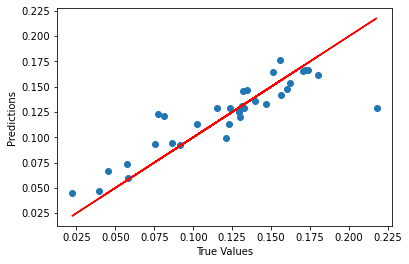

In [29]:
plt.scatter(yrfe_test, rfetree_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot(yrfe_test,yrfe_test,'r')

In [30]:
MAE = mean_absolute_error(yrfe_test,rfetree_predictions)
MSE = mean_squared_error(yrfe_test,rfetree_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(yrfe_test,rfetree_predictions)

print("the mean absolut error of the model in the test set is: %6.2f" % (MAE))
print("the mean squared error of the model in the test set is: %6.2f" % (MSE))
print("the root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("the R2 of the model in the test set is: %6.2f" % (R2))

the mean absolut error of the model in the test set is:   0.02
the mean squared error of the model in the test set is:   0.00
the root mean squared error of the model in the test set is:   0.02
the R2 of the model in the test set is:   0.76


# with PCA

In [31]:
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(X_pca, y1, test_size = 0.3, random_state = 100)

In [32]:
lm = linear_model.LinearRegression()
lm_pca = lm.fit(Xpca_train, ypca_train)
predictions_pca = lm_pca.predict(Xpca_test)

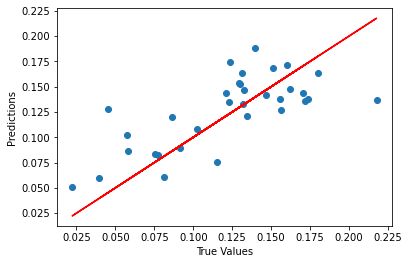

In [33]:
plt.scatter(ypca_test, predictions_pca)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot(ypca_test,ypca_test,'r')

In [34]:
MAE = mean_absolute_error(ypca_test,predictions_pca)
MSE = mean_squared_error(ypca_test,predictions_pca)
RMSE = np.sqrt(MSE)
R2 = r2_score(ypca_test,predictions_pca)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.5f" % (R2))

The mean absolute error of the model in the test set is:   0.03
The mean squared error of the model in the test set is:   0.00
The root mean squared error of the model in the test set is:   0.03
The R2 of the model in the test set is: 0.49146


In [35]:
# on random forest
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(Xpca_train,ypca_train)
pcatree_predictions = rf.predict(Xpca_test)

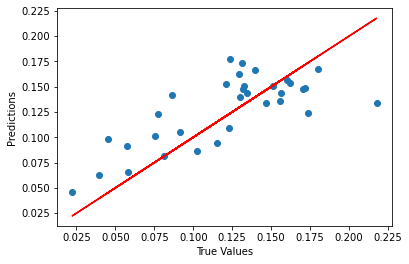

In [36]:
plt.scatter(ypca_test, pcatree_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.plot(ypca_test,ypca_test,'r')

In [37]:
MAE = mean_absolute_error(ypca_test,pcatree_predictions)
MSE = mean_squared_error(ypca_test,pcatree_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(ypca_test,pcatree_predictions)

print("the mean absolut error of the model in the test set is: %6.2f" % (MAE))
print("the mean squared error of the model in the test set is: %6.2f" % (MSE))
print("the root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("the R2 of the model in the test set is: %6.2f" % (R2))

the mean absolut error of the model in the test set is:   0.02
the mean squared error of the model in the test set is:   0.00
the root mean squared error of the model in the test set is:   0.03
the R2 of the model in the test set is:   0.53


#### RFE performs better than PCA on Linear Regression  and Random Forest Regression Models